### Nomarlization

In [5]:
# 필요한 라이브러리 호출
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

MULTI FEATURES
1. 전처리
2. 상관 관계 : corr (낮은 것은 제거)
3. 다중 공선성 : statsmodels (높은 하나의 컬럼만)
4. 정규화

In [43]:
# Boston data 불러오기
df = pd.read_csv('data/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
# dataframe 만들기
df = pd.DataFrame( df['data'])
df.columns = df['feature_names']
df['medv'] = df['target']
df

KeyError: 'data'

In [42]:
df.corr()

,0,1,2,3,4
0,1.000000,0.306770,0.721605,-0.565687,-0.668206
1,0.306770,1.000000,0.059152,-0.145378,0.281093
2,0.721605,0.059152,1.000000,-0.176519,-0.354869
3,-0.565687,-0.145378,-0.176519,1.000000,0.804104
4,-0.668206,0.281093,-0.354869,0.804104,1.000000


https://matplotlib.org/stable/tutorials/colors/colormaps.html

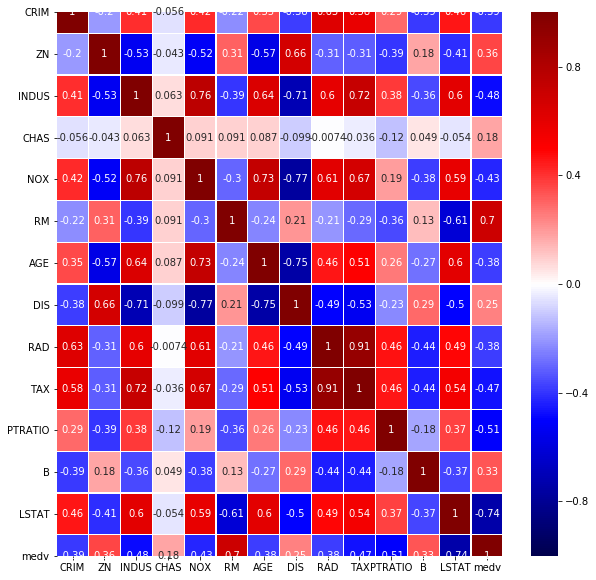

In [13]:
plt.figure( figsize=(10,10) )
sb.heatmap(df.corr() ,vmin=-1, vmax=1, annot=True, 
           linewidths=0.2, cmap="seismic")
plt.show()

---

### 정규화

In [ ]:
# import Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# data
data = [[828, 920, 1234567, 1020, 1111],
        [824, 910, 2345612, 1090, 1234],
        [880, 900, 3456123, 1010, 1000],
        [870, 990, 2312123, 1001, 1122],
        [860, 980, 3223123, 1008, 1133],
        [850, 970, 2432123, 1100, 1221]]

In [ ]:
# dataframe화
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,828,920,1234567,1020,1111
1,824,910,2345612,1090,1234
2,880,900,3456123,1010,1000
3,870,990,2312123,1001,1122
4,860,980,3223123,1008,1133
5,850,970,2432123,1100,1221


In [ ]:
# row : all / col : 마지막(label)
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, [-1]]

In [ ]:
# MinMaxScaler 적용
scaleF = MinMaxScaler()
x_dataN  =scaleF.fit_transform(x_data)

In [ ]:
# x_data 확인 (정규화 O)
x_dataN

array([[0.07142857, 0.22222222, 0.        , 0.19191919],
       [0.        , 0.11111111, 0.50012019, 0.8989899 ],
       [1.        , 0.        , 1.        , 0.09090909],
       [0.82142857, 1.        , 0.48504562, 0.        ],
       [0.64285714, 0.88888889, 0.89511856, 0.07070707],
       [0.46428571, 0.77777778, 0.53906181, 1.        ]])

In [13]:
# x_data 확인 (정규화 X)
x_data

,0,1,2,3
0,828,920,1234567,1020
1,824,910,2345612,1090
2,880,900,3456123,1010
3,870,990,2312123,1001
4,860,980,3223123,1008
5,850,970,2432123,1100


In [14]:
# label column도 MinMaxScaler 적용
scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform( y_data )

In [16]:
# y_data 확인 (정규화 O)
y_dataN

array([[0.47435897],
       [1.        ],
       [0.        ],
       [0.52136752],
       [0.56837607],
       [0.94444444]])

In [19]:
# tensor node 생성
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_dataN)

w = torch.empty( [4, 1], requires_grad=True) # [특성 데이터 수, 라벨 수]
b = torch.empty( [1], requires_grad=True) # [라벨 수]

torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.1512], requires_grad=True)

In [21]:
# cost function 정의
def cost():
    hx = torch.matmul(x, w) + b
    c = torch.mean((hx - y) ** 2)
    return c

In [22]:
# 학습
optimizer = Adam( [w,b], lr=0.01)

for epoch in range(1000):
    c = cost()
    optimizer.zero_grad()
    c.backward() 
    optimizer.step() 
    print(f'cost : {c.item()}')

cost : 0.5441072583198547
cost : 0.5074068903923035
cost : 0.4726128876209259
cost : 0.439754843711853
cost : 0.40885546803474426
cost : 0.37992969155311584
cost : 0.352984219789505
cost : 0.3280155658721924
cost : 0.3050096333026886
cost : 0.28394046425819397
cost : 0.264769047498703
cost : 0.2474428415298462
cost : 0.23189513385295868
cost : 0.218044713139534
cost : 0.2057967185974121
cost : 0.19504348933696747
cost : 0.1856663078069687
cost : 0.17753790318965912
cost : 0.17052561044692993
cost : 0.16449439525604248
cost : 0.1593104898929596
cost : 0.15484420955181122
cost : 0.1509728878736496
cost : 0.1475827842950821
cost : 0.14457066357135773
cost : 0.14184479415416718
cost : 0.13932541012763977
cost : 0.1369447559118271
cost : 0.1346469670534134
cost : 0.13238748908042908
cost : 0.13013245165348053
cost : 0.12785768508911133
cost : 0.12554790079593658
cost : 0.12319541722536087
cost : 0.12079908698797226
cost : 0.1183631643652916
cost : 0.11589605361223221
cost : 0.11340927332639

In [27]:
# 예측 함수 정의
def hxfn( xd):
    xd = torch.FloatTensor(xd)
    hx = torch.matmul(xd, w) + b
    return hx.detach().numpy()

In [ ]:
# transform
xn = scaleF.transform([[828, 920, 1234567, 1020]]) 
xn

array([[0.07142857, 0.22222222, 0.        , 0.19191919]])

In [ ]:
# 예측값
result = hxfn(xn)
result

array([[0.52634734]], dtype=float32)

In [ ]:
# 역 정규화
scaleL.inverse_transform(result)

array([[1123.1653]], dtype=float32)

---

### w,b 검증지표 :결정계수(선형회귀)
결정 계수 (Coefficient of determination, 
R 제곱 (R^2, R-squared, 피어슨 상관 계수의 제곱))
 1 - (오차의 제곱합)/(편차의 제곱합)
오차는 실제 값과 예측 값의 차이
편차는 실제 값과 평균 값의 차이
0 <= 결정 계수 <= 1 (0이면 0점, 1이면 100점)
높을 수록 좋음

In [ ]:
from sklearn.metrics import r2_score
y_predict = model.predict( x_data )
r2_score( y_data, y_predict )

In [32]:
from sklearn.metrics import r2_score

In [34]:
pred = hxFn( x )

In [35]:
r2_score(y_dataN, pred) #w, b

0.9696854513149207

In [ ]:
- 선형회귀: 결정계수
- 분류(로지스틱,softmax): f1 score, accuracy, ROC